# NLP Assignment $1$

*Neelay Upadhyaya __18210053__*

*M.Tech CSE*

#### Assignment Task

- Download any one of the text dataset mentioned in the previous lecture. 

- Compute tokens, types, and TTR.

- Plot Zipf’s law and check if Zipf’s law holds true for meanings and lengths. When and when not?

- Plot Heaps’ law. Fit a curve and report the estimated K and β values


#### Radio Button for dataset.
##### By default it's Mark Twain's Tom Sawyer

In [1]:
import ipywidgets as widgets
radio = widgets.RadioButtons(
    options=['Tom Sawyer', 'Shakespeare'],
    description='Select Dataset:'
)
display(radio)

RadioButtons(description='Select Dataset:', options=('Tom Sawyer', 'Shakespeare'), value='Tom Sawyer')

In [2]:
# We will use nltk for tokenizing
# so let's import
from nltk.tokenize import regexp_tokenize

In [3]:
# what dataset have we selected?
dataset = radio.value

In [4]:
print("Dataset selected: " + dataset)

# open the corresponding dataset file
file = open(dataset.lower().replace(' ', '_') + ".txt")

# tokenize
tokens = regexp_tokenize(file.read(), "[\w']+")

# normalize the data to lowercase
tokens = [w.lower() for w in tokens]

Dataset selected: Shakespeare


---
#### TOKENS

In [5]:
# Length of the tokens
token_length = len(tokens)
print("Tokens: " + str(token_length))

Tokens: 493434


---
#### TYPES

In [6]:
# Length of types
type_length = len(sorted(set(tokens)))
print("Types: " + str(type_length))

Types: 21130


---
#### Type / Token Ratio $(TTR)$

In [7]:
# type / token ratio
ttr = type_length / token_length
print("TTR: " + str(ttr))

TTR: 0.042822343008386124


In [8]:
# We will now map tokens to their frequencies
token_dict = {}
for token in tokens:
    # if token doesn't exist, return 0
    freq = token_dict.get(token, 0)
    token_dict[token] = freq + 1

# sort the token_dict according to the frequency in descending order
token_list = sorted(list(token_dict.items()), key=lambda x: x[1],reverse=True)

In [9]:
# optional if pandas is not installed.
# Pandas is used to show the data in a table.
!pip install pandas


In [10]:
import pandas as panda

# we will show 30 most frequent tokens
most_common = token_list[:30]
data_frame = panda.DataFrame(most_common, columns=['word', 'frequency'])

# ranking starts from 1
data_frame.index = data_frame.index + 1

# Index column name
data_frame.columns.name = "rank"

display(data_frame)

rank,word,frequency
1,the,16155
2,and,14718
3,to,10815
4,of,10527
5,i,10483
6,a,7834
7,you,7145
8,my,6670
9,in,6166
10,that,6071


### Zipf's Law###

**A relationship between the frequency of a word ( $f$ ) and its position in the list (its rank $r$).**


---



### $f \propto \frac{1}{r}$ ###

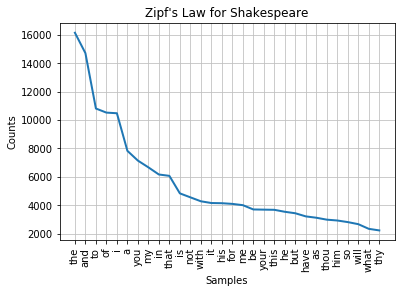

In [16]:
# plotting frequency distribution
from nltk.probability import FreqDist

freq_dist = FreqDist(tokens)
freq_dist.plot(30, title="Zipf's Law for " + dataset)


**In the above figure, we have $30$ samples**

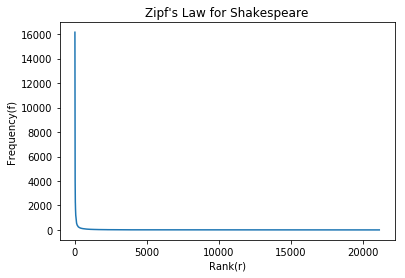

In [12]:
# plotting the whole graph
import matplotlib.pyplot as pyplot

pyplot.plot([r for r in range(1, len(token_list) + 1)], [i[1] for i in token_list])

pyplot.xlabel('Rank(r)')
pyplot.ylabel('Frequency(f)')
pyplot.title("Zipf's Law for " + dataset)

pyplot.show()


**In the above figure, we plot the whole Graph**

---

### Correlation: Word length and word frequency ###

**Word frequency ( $f$ ) is inversely proportional to their length ( $l$ ).**

---

### $l \propto \frac{1}{f} $###

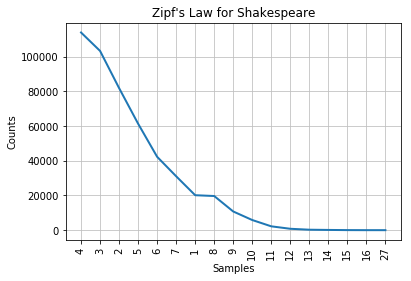

     4      3      2      5      6      7      1      8      9     10     11     12     13     14     15     16     27 
113862 103244  81837  61325  42258  31043  20134  19672  10764   5841   2211    801    264    132     39      6      1 


In [13]:
# finding all lengths
lengths = [len(w) for w in tokens]

length_freq_dist = FreqDist(lengths)

length_freq_dist.plot(title="Zipf's Law for " + dataset)

length_freq_dist.tabulate()

From the above figure, it is clear that relation between $l$ and $f$ does not hold for words of length $1$

---

### Correlation: Number of meanings and word frequency ###

**The number of meanings ( $m$ ) of a word obeys the law:**

---

### $ m \propto \sqrt{f} $ ###

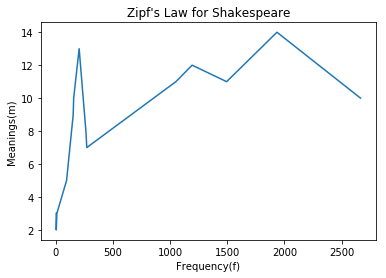

Token:chronicle, Frequency: 5, Meanings: 2
Token:kill, Frequency: 95, Meanings: 5
Token:dainty, Frequency: 10, Meanings: 3
Token:across, Frequency: 4, Meanings: 3
Token:place, Frequency: 264, Meanings: 8
Token:back, Frequency: 205, Meanings: 13
Token:keep, Frequency: 272, Meanings: 7
Token:well, Frequency: 1193, Meanings: 12
Token:will, Frequency: 2666, Meanings: 10
Token:last, Frequency: 153, Meanings: 9
Token:get, Frequency: 157, Meanings: 10
Token:do, Frequency: 1935, Meanings: 14
Token:good, Frequency: 1495, Meanings: 11
Token:like, Frequency: 1051, Meanings: 11


In [14]:
meaning_dict = {
    'chronicle': [token_dict.get('chronicle'), 2],
    'kill': [token_dict.get('kill'), 5],
    'dainty': [token_dict.get('dainty'), 3],
    'across': [token_dict.get('across'), 3],
    'place': [token_dict.get('place'), 8],
    'back': [token_dict.get('back'), 13],
    'keep': [token_dict.get('keep'), 7],
    'well': [token_dict.get('well'), 12],
    'will': [token_dict.get('will'), 10],
    'last': [token_dict.get('last'), 9],
    'get': [token_dict.get('get'), 10],
    'do': [token_dict.get('do'), 14],
    'good': [token_dict.get('good'), 11],
    'like': [token_dict.get('like'), 11],
    
}
pyplot.plot(*zip(*sorted(list(meaning_dict.values()))))

pyplot.xlabel('Frequency(f)')
pyplot.ylabel('Meanings(m)')
pyplot.title("Zipf's Law for " + dataset)

pyplot.show()

for key, value in meaning_dict.items():
    print("Token:" + key + ", Frequency: " + str(value[0]) + ", Meanings: " + str(value[1]))

### Heap's Law ###

Let $\left |  V \right |$ be the size of vocabulary and $N$ be the number of tokens.

---

#### $\left |  V \right | = K N^{\beta}$ ####


$ \Rightarrow \log{\left |  V \right |} = \log{K} + \beta.\log{N}$



$ \Rightarrow y = c + m.x$

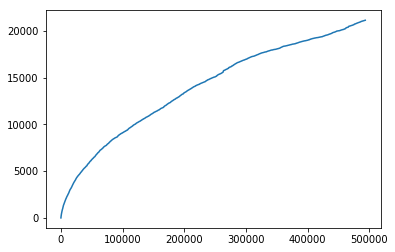

Value of K: 12.748329893793445
Value of B: 0.5687119879326396


In [15]:
from math import log, exp
from numpy import polyfit
import matplotlib.pyplot as plt
token_n = set()
heaps_x_y = []
log_heaps_x_y = []

for i, token in enumerate(tokens):
    token_n.add(token)
    log_heaps_x_y.append((log(i + 1), log(len(token_n))))
    heaps_x_y.append(((i + 1), len(token_n)))


plt.plot(*zip(*sorted(heaps_x_y)))

plt.show()

slope, intercept = polyfit(*zip(*sorted(log_heaps_x_y)), 1)

print("Value of K: " + str(exp(intercept)))
print("Value of B: " + str(slope))

Typically we have,
- $K \approx  10-100$
- $\beta \approx  0.4 - 0.6$ (roughly square root)